In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip install tensorflow keras numpy matplotlib pandas sklearn Bio torch 


     |████████████████████████████████| 2.3MB 2.8MB/s 


In [3]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from keras.optimizers import Adam, SGD
import math
import numpy
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
print(os.listdir("/content/drive/My Drive/Colab_Notebooks/cat_dog/dataset/"))

['training_set', 'testing_set']


In [5]:
filenames = os.listdir("/content/drive/My Drive/Colab_Notebooks/cat_dog/dataset/training_set")
categories = []
y_test=[]
for i in filenames:
    category = i.split('.')[0]
    if category == 'dog':
        categories.append('dog')
        y_test.append(1)
    else:
        categories.append('cat')
        y_test.append(0)

print(categories[:5])
print(y_test[:5])
y_test=np.array(y_test)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

['dog', 'dog', 'dog', 'dog', 'dog']
[1, 1, 1, 1, 1]


In [6]:
# Create a dataframe for the test data
test_filenames = os.listdir("/content/drive/My Drive/Colab_Notebooks/cat_dog/reduced_dataset/testing_set/")
test_categories = []
yy_test=[]
for filename in test_filenames:
    test_category = filename.split('.')[0]
    if test_category == 'dog':
        test_categories.append('dog')
        yy_test.append(1)
    else:
        test_categories.append('cat')
        yy_test.append(0)

yy_test=np.array(yy_test)
print(test_categories[:5])
print(yy_test[:5])
print(len(test_categories))
print(len(yy_test))

test_data = pd.DataFrame({
    'test_filename': test_filenames,
    'test_category': test_categories
})

['cat', 'cat', 'cat', 'cat', 'cat']
[0 0 0 0 0]
36
36


In [7]:
print(df.shape)
df.head()


(8010, 2)


,filename,category
0,dog.1192.jpg,dog
1,dog.1688.jpg,dog
2,dog.3019.jpg,dog
3,dog.1288.jpg,dog
4,dog.1207.jpg,dog


In [8]:
# Checking the distibution of categories.
df['category'].value_counts()

dog    4010
cat    4000
Name: category, dtype: int64

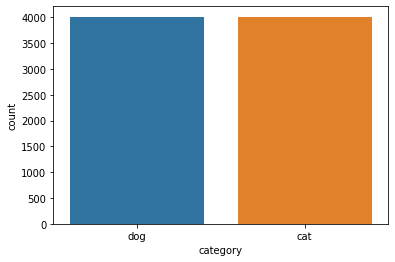

In [9]:
sns.countplot(x='category', data=df)

In [10]:
filenames[0]

'dog.1192.jpg'

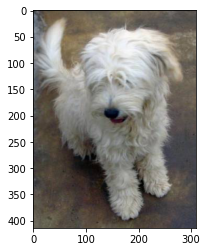

In [11]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Colab_Notebooks/cat_dog/dataset/training_set/"+filenames[0])
plt.imshow(img)

In [12]:
idg = ImageDataGenerator(width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.3,
                         shear_range=0.2,
                         fill_mode='nearest',
                         horizontal_flip = True,
                         vertical_flip=True,
                         rescale=1./255)

In [13]:
from sklearn.model_selection import StratifiedKFold
Y=y_test
print(Y[0])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
accu_lst = []
sen_lst=[]
pre_lst=[]
acc_lst=[]
mcc_lst=[]
auc_lst=[]

1


In [14]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [15]:
from sklearn.model_selection import StratifiedKFold
VALIDATION_ACCURACY = []
VALIDAITON_LOSS = []

save_dir = '/content/drive/My Drive/Colab_Notebooks/cat_dog/'
fold_var = 1

with tf.Session() as sess:

  for train_index, val_index in kfold.split(np.zeros(8010),Y):
    training_data = df.iloc[train_index]
    
    validation_data = df.iloc[val_index]
    
    train_data_generator = idg.flow_from_dataframe(training_data, directory = "/content/drive/My Drive/Colab_Notebooks/cat_dog/dataset/training_set/",
                    x_col='filename',
                    y_col='category',
                    target_size=(128, 128),
                    batch_size=32,
                    class_mode='categorical',
                    shuffle = True)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory = "/content/drive/My Drive/Colab_Notebooks/cat_dog/dataset/training_set/",
                x_col='filename',
                y_col='category',
                target_size=(128, 128),
                class_mode='categorical', 
                shuffle = True)
    #Build the CNN model
    model = Sequential()
    # add model layers
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3),
                                padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
                                padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization(),)
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
    
  
    # # FIT THE MODEL
    history = model.fit(train_data_generator,epochs=50 , verbose=0)
    
    #  Predict the classes of all the images from test set.
    predict = model.predict_generator(valid_data_generator)
    y_pred = np.argmax(predict, axis=1)


    #confution matrix generation
    cm=np.array(confusion_matrix(Y[val_index],y_pred,labels=[0,1]))
    confusion=pd.DataFrame(cm,index=['cat','dog'],
                              columns=['predicted_cat','predicted_dog'])
      
    True_Positive=confusion.at['cat','predicted_cat']
    False_Positive=confusion.at['dog','predicted_cat']
    True_Negative=confusion.at['dog','predicted_dog']
    False_Negative=confusion.at['cat','predicted_dog']
      
    #Accuracy==>>accuracy = (correctly predicted class / total testing class) × 100%
    # accuracy_score(y_predict, y_test)

    total_testing_class=True_Positive+True_Negative+False_Positive+False_Negative
    correctly_predicted_class=True_Positive + True_Negative
    accuracy = (correctly_predicted_class / total_testing_class) * 100
      
    # Precision = TP / TP + FP
    precision = (True_Positive / (True_Positive + False_Positive))*100
      
    # Sensitivity = TP / TP + FN
    sensitivity = (True_Positive / (True_Positive + False_Negative))*100

    #ACC=TP+TN / TP+FP+TN+FN
    acc = (True_Positive + True_Negative) /(True_Positive+True_Negative+False_Positive+False_Negative) *100
    #MCC = TP*TN - FN*FP / sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN))
    mcc = ((True_Positive * True_Negative) - (False_Positive * False_Negative)) / math.sqrt((True_Positive + False_Negative) * (True_Negative + False_Positive)*(True_Positive + False_Positive)*(True_Negative + False_Negative)) *100
      
    # # AUC score
    # lr_probs = model.predict_proba(valid_data_generator)
    # # lr_probs = lr_probs[:, 1]
    # lr_auc = (roc_auc_score(Y[val_index], lr_probs, multi_class="ovr",average="macro"))*100
  


    print(" Accuracy :%.2f%%   Precision :%.2f%%   Sensitivity :%.2f%%      MCC :%.2f%% "% (accuracy,precision,sensitivity,mcc))
    accu_lst.append(accuracy)
    sen_lst.append(sensitivity)
    pre_lst.append(precision)
    acc_lst.append(acc)
    mcc_lst.append(mcc)
  print('\n')
  print ('10 Fold cross-validation performance measurement :')
  print("Accuracy    :%.2f%% (+/- %.2f%%)" % (numpy.mean(accu_lst), numpy.std(accu_lst)))
  print("Precision   :%.2f%% (+/- %.2f%%)" % (numpy.mean(pre_lst), numpy.std(pre_lst)))
  print("Sensitivity :%.2f%% (+/- %.2f%%)" % (numpy.mean(sen_lst), numpy.std(sen_lst)))
  print("MCC         :%.2f%% (+/- %.2f%%)" % (numpy.mean(mcc_lst), numpy.std(mcc_lst)))


  #independent_test

  test_data_generator  = idg.flow_from_dataframe(test_data, directory = "/content/drive/My Drive/Colab_Notebooks/cat_dog/reduced_dataset/testing_set/",
                x_col='test_filename',
                y_col='test_category',
                target_size=(128, 128),
                batch_size=5,
                class_mode='categorical', 
                shuffle = True)

      
  test_prediction = model.predict(test_data_generator)
  yy_pred=( np.argmax(test_prediction,axis=1))

  results = confusion_matrix(yy_test,yy_pred) 
  print('\n')
  print ('Independent test set performance measurement :')
  print ('Confusion Matrix :')
  print(results) 
  print ('Accuracy Score :',accuracy_score(yy_test,yy_pred))
  print ('Report : ')
  print (classification_report(yy_test,yy_pred))


from matplotlib import pyplot
# calculate roc curves

fpr, tpr, _ = roc_curve(Y[val_index], y_pred)
roc_auc = auc(fpr, tpr)

test_fpr, test_tpr, _ = roc_curve(yy_test, yy_pred)
test_roc_auc = auc(test_fpr, test_tpr)

# plot the roc curve for the model
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.plot(fpr,tpr,label="10-fold cross-validation(AUC)=%.2f%%" % (roc_auc))
pyplot.plot(test_fpr,test_tpr,label="Independent test(AUC)=%.2f%%" % (test_roc_auc))
# show the legend
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# show the plot
pyplot.show()
    

Found 6408 validated image filenames belonging to 2 classes.
Found 1602 validated image filenames belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


KeyboardInterrupt: ignored